In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pythreejs import *
from IPython.display import display
import lorm
from nfft import nfsft
import disc.energy_curveling_s2

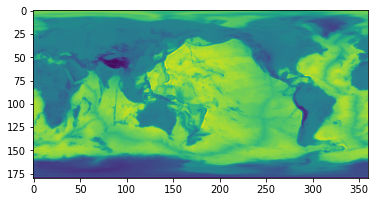

In [21]:
# compute Fourier coefficients of the measure mu
img = plt.imread('data/earth.png')[::-1,:]
N_img = img.shape[0]
theta = np.linspace(np.pi/(2*N_img),np.pi-np.pi/(2*N_img),img.shape[0],endpoint=True)
phi = np.linspace(0,2*np.pi,2*N_img,endpoint=False)

theta_grid,phi_grid = np.meshgrid(theta,phi)
quat_nodes = np.array([theta_grid.ravel()[::-1],phi_grid.ravel()[:]]).transpose()

nfsft_plan = nfsft.plan(2*N_img**2,N_img)
nfsft_plan.set_local_coords(quat_nodes) 
img_hat = nfsft_plan.compute_Ymatrix_adjoint_multiplication(img.transpose().ravel()[:]*np.sin(quat_nodes[:,0]),N_img)
img_hat.array[:] = img_hat.array[:]/ img_hat[0,0]
plt.imshow(1-np.real(nfsft_plan.compute_Ymatrix_multiplication(img_hat).reshape(360,180)).transpose())

In [27]:
# initial curve
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
m = 200
local_coords = 2*np.pi*np.random.rand(m,2)
for i in range(m):
    local_coords[i,0] = np.pi/2*(1+0.4*np.sin(10*np.pi*i/m))
    local_coords[i,1] = 2*np.pi*i/m
points.local_coords = local_coords

In [28]:
# setup energy functional
L=30
N=16
energy = disc.energy_curveling_s2.plan(m,N,0.00001,L)
if N <= img_hat.N:
    for n in range(N+1):
        energy._mu_hat[n,:] = img_hat[n,:]
if N > img_hat.N:
    for n in range(img_hat.N+1):
        energy._mu_hat[n,:] = img_hat[n,:]

In [29]:
# setup interactive renderview
g1 = BufferGeometry(attributes={'position': BufferAttribute(points.coords, normalized=False) })
m1 = LineBasicMaterial(vertexColors='VertexColors', linewidth=2)
line = Line(g1,m1)

c = PerspectiveCamera(position=[0, 2, 2], up=[0, 2, 0],
                      children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.1)])
sphere = Mesh(SphereBufferGeometry(1,32,16), MeshStandardMaterial(color='white'))

scene = Scene(children=[line, sphere, c, AmbientLight(color='#FFFFFF')])

renderer = Renderer(camera=c,
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)])
renderer.width =400
renderer.height =400
display(renderer)

def update_points(p):
    g1.attributes['position'].array = p.coords
    return

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.1, position=(3.0, 5.0,…

In [30]:
# compute local minimizer
method = lorm.optim.ConjugateGradientMethod(max_iter=100)
method.listener = update_points
for i in range(5):
    points = method.run(energy,points)

Initial value: f[0] = 0.007766520073153302
f[1] = 0.001986268396815246
f[2] = 0.0005060430939417688
f[3] = 0.0003181406091439925
f[4] = 0.00027662091001739715
f[5] = 0.0002463356288380661
f[6] = 0.0002234678250205641
f[7] = 0.0002071218226704657
f[8] = 0.00019969261820586287
f[9] = 0.00019436483161198892
f[10] = 0.0001898569445163315
f[11] = 0.000185220377580324
f[12] = 0.00017994491937311022
f[13] = 0.00017625228367473863
f[14] = 0.00017358737927415432
f[15] = 0.00017047314598397814
f[16] = 0.0001659817262428726
f[17] = 0.00016241773825452578
f[18] = 0.00015863900941999535
f[19] = 0.00015455343117949438
f[20] = 0.0001508787028017187
f[21] = 0.0001477996429708649
f[22] = 0.00014546117933918553
f[23] = 0.00014298375361702863
f[24] = 0.0001406924159795649
f[25] = 0.00013876574350240868
f[26] = 0.0001369048440556065
f[27] = 0.00013531517669616283
f[28] = 0.00013404392489325454
f[29] = 0.00013255036755347333
f[30] = 0.0001312019940557001
f[31] = 0.0001298448259211927
f[32] = 0.000128529403

f[69] = 7.007871851403843e-05
f[70] = 7.005583068847803e-05
f[71] = 7.003152650270617e-05
f[72] = 7.000444249189128e-05
f[73] = 6.997302250144254e-05
f[74] = 6.994446640875959e-05
f[75] = 6.99153674318475e-05
f[76] = 6.988703377204765e-05
f[77] = 6.985339876314669e-05
f[78] = 6.981585134259e-05
f[79] = 6.976944433446819e-05
f[80] = 6.973021350304699e-05
f[81] = 6.968837836505843e-05
f[82] = 6.964824535979472e-05
f[83] = 6.958954456534693e-05
f[84] = 6.953250056908707e-05
f[85] = 6.947822191739424e-05
f[86] = 6.941534898832622e-05
f[87] = 6.935069848022856e-05
f[88] = 6.92811271112049e-05
f[89] = 6.920966502301454e-05
f[90] = 6.912512422929132e-05
f[91] = 6.904901133031399e-05
f[92] = 6.897542606634576e-05
f[93] = 6.890802297239585e-05
f[94] = 6.884722876757333e-05
f[95] = 6.880445577260229e-05
f[96] = 6.875689379768195e-05
f[97] = 6.871798761987308e-05
f[98] = 6.867707928283737e-05
f[99] = 6.863166595775829e-05
f[100] = 6.857350725857549e-05
Reached maximal iterations!
Initial value: f

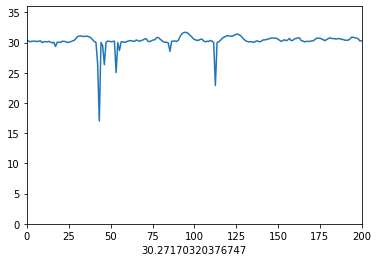

In [31]:
# plot the distance of consecutive points on the curve
fig = plt.figure()
bx = fig.add_subplot(111)
bx.axis(np.array([0,m,0,1.2*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)

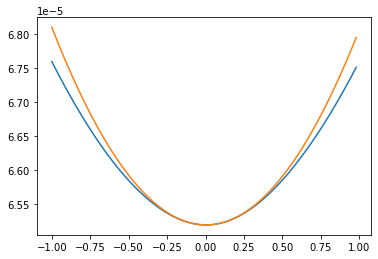

In [32]:
# compute the quadratic approximation to test the gradient and Hessian
%matplotlib inline
v=energy.grad(points)
v.coords = 0.002*np.random.randn(m,3)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)